In [1]:
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold
import pandas as pd # sử dụng pd.DataFrame(), pd.DataFrame.cat(), pd.DataFrame.stack(), pd.DataFrame.join(), pd.DataFrame.merge()
import numpy as np # sử dụng np.array(), np.arrange(), np.sum(), np.mean()

import pandas as pd # sử dụng pd.read_csv() với tham số mặc định và pd.DataFrame.drop()
from sklearn.metrics import classification_report, r2_score # sử dụng tham số mặc định
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline


# minsun attemp

In [2]:
df_clf=pd.read_csv('datasets/heart.csv').drop(columns='Unnamed: 0')

columns = df_clf.columns.difference(['AHD'])
np.random.seed(22521060)

for _ in range(30):
    row_index = np.random.randint(0, df_clf.shape[0])
    col_index = np.random.choice(columns)
    
    df_clf.loc[row_index, col_index] = np.nan
df_clf.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63.0,1.0,typical,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,fixed,No
1,67.0,1.0,asymptomatic,160.0,NaN,0.0,2.0,108.0,1.0,1.5,2.0,3.0,normal,Yes
2,67.0,1.0,asymptomatic,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,reversable,Yes
3,37.0,1.0,nonanginal,NaN,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,normal,No
4,41.0,0.0,nontypical,130.0,204.0,0.0,2.0,172.0,0.0,1.4,NaN,0.0,normal,No


In [3]:
df_clf.isna().sum()

Age          2
Sex          3
ChestPain    2
RestBP       2
Chol         4
Fbs          1
RestECG      2
MaxHR        3
ExAng        3
Oldpeak      3
Slope        2
Ca           1
Thal         2
AHD          0
dtype: int64

In [4]:
df_reg=pd.read_csv('datasets/insurance.csv')
columns = df_reg.columns.difference(['charges'])
np.random.seed(22521060)

for _ in range(30):
    row_index = np.random.randint(0, df_reg.shape[0])
    col_index = np.random.choice(columns)
    
    df_reg.loc[row_index, col_index] = np.nan
df_reg.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [5]:
df_reg.isna().sum()

age         4
sex         5
bmi         4
children    7
smoker      4
region      6
charges     0
dtype: int64

**MINSUN**

**Classification with LogisticRegression**

In [6]:
df_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        48 non-null     float64
 1   Sex        47 non-null     float64
 2   ChestPain  48 non-null     object 
 3   RestBP     48 non-null     float64
 4   Chol       46 non-null     float64
 5   Fbs        49 non-null     float64
 6   RestECG    48 non-null     float64
 7   MaxHR      47 non-null     float64
 8   ExAng      47 non-null     float64
 9   Oldpeak    47 non-null     float64
 10  Slope      48 non-null     float64
 11  Ca         49 non-null     float64
 12  Thal       48 non-null     object 
 13  AHD        50 non-null     object 
dtypes: float64(11), object(3)
memory usage: 5.6+ KB


In [7]:
numeric_na = ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']
categorical_na = ['ChestPain', 'Thal']

In [8]:
imputer1 = KNNImputer(n_neighbors=2, metric='nan_euclidean')
df_imputed1 = imputer1.fit_transform(df_clf[numeric_na])
df1 = pd.DataFrame(df_imputed1, columns=numeric_na)
imputer2 = SimpleImputer(strategy='most_frequent')
df_imputed2 = imputer2.fit_transform(df_clf[categorical_na])
df2 = pd.DataFrame(df_imputed2, columns=categorical_na)
df_clf = pd.concat([df1, df2, df_clf[['AHD']]], axis=1)

In [9]:
df_clf.isna().sum()

Age          0
Sex          0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
ChestPain    0
Thal         0
AHD          0
dtype: int64

In [10]:
X_clf = df_clf.drop(columns =['AHD'])
y_clf = df_clf[['AHD']]
y_clf = LabelEncoder().fit_transform(y_clf)

d:\Learning\University\UIT\HK4\OnTap\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn.model_selection import train_test_split
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, random_state=42, test_size=0.3)

In [12]:
numeric_cols = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
categorical_cols = ['ChestPain', 'Thal']
print(numeric_cols, categorical_cols)

['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak'] ['ChestPain', 'Thal']


In [13]:
preprocessing = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(), categorical_cols),
    ],
    remainder = 'passthrough'
)
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']),
                                ('cat', OneHotEncoder(),
                                 ['ChestPain', 'Thal'])])

In [14]:
model = Pipeline([
    ('pre', preprocessing),
    ('logistic', LogisticRegression())
    ]
)

In [15]:
params = {
    'logistic__C': [0.001, 0.01, 0.1, 1],  # Điều chỉnh độ mạnh của regularization
    'logistic__solver': ['lbfgs', 'liblinear'],  # Phương pháp tối ưu hóa
    'logistic__penalty': ['l2'],  # Loại regularization penalty
    'logistic__class_weight': [None, 'balanced']  # Cân bằng trọng số của các lớp
}

In [16]:
cv=KFold(n_splits=5, shuffle=True)

In [17]:
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=200, cv=cv, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_clf_train, y_clf_train)

d:\Learning\University\UIT\HK4\OnTap\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=200. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits


d:\Learning\University\UIT\HK4\OnTap\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('pre',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'RestBP',
                                                                                'Chol',
                                                                                'MaxHR',
                                                                                'Oldpeak']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['ChestPain',
                                                                                'Thal'])])),
                                             ('logistic',
                                              LogisticRegression())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'logistic__C': [0.001, 0.01, 0.1, 1],
                                        'logistic__class_weight': [None,
                                                                   'balanced'],
                                        'logistic__penalty': ['l2'],
                                        'logistic__solver': ['lbfgs',
                                                             'liblinear']},
                   random_state=42, verbose=2)

In [18]:
print("Các tham số tốt nhất:", random_search.best_params_)

# Đánh giá hiệu suất của mô hình tốt nhất trên tập kiểm tra
best_model = random_search.best_estimator_
y_clf_pred = best_model.predict(X_clf_test)
cla_re = classification_report(y_clf_test, y_clf_pred)
print("Report:", cla_re)

Các tham số tốt nhất: {'logistic__solver': 'liblinear', 'logistic__penalty': 'l2', 'logistic__class_weight': None, 'logistic__C': 0.1}
Report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.95      0.90      0.92        15
weighted avg       0.94      0.93      0.93        15



**Regression with DecisionTreeRegressor**

In [19]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1334 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1331 non-null   float64
 4   smoker    1334 non-null   object 
 5   region    1332 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [20]:
numeric_na = ['age', 'bmi', 'children']
categorical_na = ['sex', 'smoker', 'region']

In [21]:
imputer1 = SimpleImputer(strategy='mean')
df_imputed1 = imputer1.fit_transform(df_reg[numeric_na])
df1 = pd.DataFrame(df_imputed1, columns=numeric_na)
imputer2 = SimpleImputer(strategy='most_frequent')
df_imputed2 = imputer2.fit_transform(df_reg[categorical_na])
df2 = pd.DataFrame(df_imputed2, columns=categorical_na)
df_reg = pd.concat([df1, df2, df_reg[['charges']]], axis=1)

In [22]:
X_reg = df_reg.drop(columns=['charges'])
y_reg = df_reg[['charges']]

In [23]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [24]:
categorical_cols = ['sex', 'smoker', 'region']

In [25]:
preprocessing = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [26]:
model = Pipeline([
    ('pre', preprocessing),
    ('Der', TransformedTargetRegressor(regressor=DecisionTreeRegressor(), func=np.log, inverse_func=np.exp))
])


In [27]:
params = {
    'Der__regressor__max_depth': [None, 1, 2, 3, 4, 5, 10],
    'Der__regressor__min_samples_split': [2, 5, 10, 12],
    'Der__regressor__min_samples_leaf': [1, 2, 4, 6, 8],
}

In [28]:
grid_search = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_reg_train, y_reg_train)

d:\Learning\University\UIT\HK4\OnTap\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('Der',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=DecisionTreeRegressor()))]),
             n_jobs=-1,
             param_grid={'Der__regressor__max_depth': [None, 1, 2, 3, 4, 5, 10],
                         'Der__regressor__min_samples_leaf': [1, 2, 4, 6, 8],
                         'Der__regressor__min_samples_split': [2, 5, 10, 12]})

In [29]:
print("Các tham số tốt nhất:", grid_search.best_params_)

# Đánh giá hiệu suất của mô hình tốt nhất trên tập kiểm tra
best_model = grid_search.best_estimator_
y_reg_pred = best_model.predict(X_reg_test)
r2 = r2_score(y_reg_test, y_reg_pred)
print("r2_score:", r2)

Các tham số tốt nhất: {'Der__regressor__max_depth': 4, 'Der__regressor__min_samples_leaf': 1, 'Der__regressor__min_samples_split': 2}
r2_score: 0.8612711610946668


**Classification with DecisionTree**

In [30]:
df_clss = pd.read_csv('datasets/heart.csv').drop(columns='Unnamed: 0')

columns = df_clss.columns.difference(['AHD'])
np.random.seed(20022004)

for _ in range(40):
    row_index = np.random.randint(0, df_clss.shape[0])
    col_index = np.random.choice(columns)
    
    df_clss.loc[row_index, col_index] = np.nan
df_clss.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,NaN,1.0,NaN,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,fixed,No
1,67.0,1.0,asymptomatic,160.0,NaN,0.0,2.0,108.0,1.0,1.5,NaN,3.0,normal,Yes
2,67.0,1.0,NaN,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,reversable,Yes
3,37.0,NaN,nonanginal,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,normal,No
4,41.0,0.0,nontypical,130.0,204.0,0.0,2.0,172.0,0.0,1.4,NaN,0.0,normal,No


In [31]:
df_clss.isna().sum()

Age          6
Sex          3
ChestPain    3
RestBP       2
Chol         4
Fbs          1
RestECG      1
MaxHR        2
ExAng        5
Oldpeak      3
Slope        3
Ca           4
Thal         1
AHD          0
dtype: int64

In [32]:
df_clss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        44 non-null     float64
 1   Sex        47 non-null     float64
 2   ChestPain  47 non-null     object 
 3   RestBP     48 non-null     float64
 4   Chol       46 non-null     float64
 5   Fbs        49 non-null     float64
 6   RestECG    49 non-null     float64
 7   MaxHR      48 non-null     float64
 8   ExAng      45 non-null     float64
 9   Oldpeak    47 non-null     float64
 10  Slope      47 non-null     float64
 11  Ca         46 non-null     float64
 12  Thal       49 non-null     object 
 13  AHD        50 non-null     object 
dtypes: float64(11), object(3)
memory usage: 5.6+ KB


In [33]:
cat_cols = df_clss.select_dtypes(include='object').columns.difference(['AHD']).tolist()
num_cols = df_clss.select_dtypes(include='number').columns.tolist()
print(cat_cols)
print(num_cols)

['ChestPain', 'Thal']
['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']


In [34]:
# cat_imputer = SimpleImputer(strategy='most_frequent')
# cat_df = pd.DataFrame(cat_imputer.fit_transform(df_clss[cat_cols]), columns=cat_cols)
# num_imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')
# num_df = pd.DataFrame(num_imputer.fit_transform(df_clss[num_cols]), columns=num_cols)
# df_clss = pd.concat([cat_df, num_df, df_clss[['AHD']]], axis=1)
# df_clss.head()

In [35]:
imputer_trans = ColumnTransformer([
    ('cat', SimpleImputer(strategy='most_frequent'), cat_cols),
    ('num', KNNImputer(n_neighbors=5, metric='nan_euclidean'), num_cols),
    ],
    remainder='passthrough'
)
np_imputer=imputer_trans.fit_transform(df_clss)
df_clss=pd.DataFrame(np_imputer, columns=cat_cols+num_cols+['AHD'])
df_clss.head()

,ChestPain,Thal,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
0,asymptomatic,fixed,60.4,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,No
1,asymptomatic,normal,67.0,1.0,160.0,242.6,0.0,2.0,108.0,1.0,1.5,2.2,3.0,Yes
2,asymptomatic,reversable,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,Yes
3,nonanginal,normal,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,No
4,nontypical,normal,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.8,0.0,No


In [36]:
df_clss.isna().sum()

ChestPain    0
Thal         0
Age          0
Sex          0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
AHD          0
dtype: int64

In [37]:
X_clss=df_clss.drop(columns='AHD')
y_clss=df_clss[['AHD']]

In [38]:
X_clss_train, X_clss_test, y_clss_train, y_clss_test=train_test_split(X_clss, y_clss, test_size=0.3, random_state=42)

In [39]:
preprocessing = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_cols),
    ],
    remainder='passthrough'
)

In [40]:
pipeline = Pipeline([
    ('pre', preprocessing),
    ('DeClf', DecisionTreeClassifier())
])

In [41]:
params = {
    'DeClf__criterion': ['gini', 'entropy'],  # Phương pháp đánh giá chất lượng phân tách
    'DeClf__splitter': ['best', 'random'],    # Chiến lược phân tách node
    'DeClf__max_depth': [1, 2, 5, 10, 20],  # Độ sâu tối đa của cây
    'DeClf__min_samples_split': [5, 10, 15, 20],    # Số mẫu tối thiểu yêu cầu để phân tách một node
    'DeClf__min_samples_leaf': [1, 2, 4, 6, 10],      # Số mẫu tối thiểu ở mỗi lá
}

In [42]:
cv=StratifiedGroupKFold(n_splits=5)

In [43]:
random_search = RandomizedSearchCV(pipeline, param_distributions=params, random_state=0, cv=cv)

In [44]:
random_search.fit(X_clss_train, y_clss_train)

d:\Learning\University\UIT\HK4\OnTap\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Learning\University\UIT\HK4\OnTap\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Learning\University\UIT\HK4\OnTap\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Learning\University\UIT\HK4\OnTap\.venv\Lib\site-packages\sklearn\pipeline.py", line 1003, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Learning\University\UIT\HK4\OnTap\.venv\Lib\site-packages\sklearn\utils\_set_output.py", 

RandomizedSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('pre',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(),
                                                                               ['ChestPain',
                                                                                'Thal'])])),
                                             ('DeClf',
                                              DecisionTreeClassifier())]),
                   param_distributions={'DeClf__criterion': ['gini', 'entropy'],
                                        'DeClf__max_depth': [1, 2, 5, 10, 20],
                                        'DeClf__min_samples_leaf': [1, 2, 4, 6,
                                                                    10],
                                        'DeClf__min_samples_split': [5, 10, 15,
                                                                     20],
                                        'DeClf__splitter': ['best', 'random']},
                   random_state=0)

In [45]:
print("Best param: ", random_search.best_params_)

best_model=random_search.best_estimator_
y_clss_pred = best_model.predict(X_clss_test)
clss_rep=classification_report(y_clss_test, y_clss_pred)
print(clss_rep)

Best param:  {'DeClf__splitter': 'best', 'DeClf__min_samples_split': 15, 'DeClf__min_samples_leaf': 2, 'DeClf__max_depth': 10, 'DeClf__criterion': 'gini'}
              precision    recall  f1-score   support

          No       0.86      0.60      0.71        10
         Yes       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.68      0.70      0.66        15
weighted avg       0.74      0.67      0.68        15



# Gad Attempt

In [46]:
# Copy từ anh MinSun và ChatGPT
def produceNan(df, exclude_columns, nan_percentage, seed=None):
    """
    Introduce NaN values into a DataFrame at random locations.

    Parameters:
    - df (pd.DataFrame): The DataFrame in which to introduce NaNs.
    - exclude_columns (list): List of columns to exclude from NaN introduction.
    - nan_percentage (float): Percentage of NaN values to introduce (e.g., 0.1 for 10%).
    - seed (int, optional): Random seed for reproducibility. Defaults to None.

    Returns:
    - pd.DataFrame: DataFrame with NaN values introduced.
    """
    if not (0 <= nan_percentage <= 1):
        raise ValueError("nan_percentage should be a float between 0 and 1 (inclusive).")
    
    columns = df.columns.difference(exclude_columns)
    
    print(f"Excluded columns: {exclude_columns}")
    print(f"Included columns: {columns.tolist()}")

    total_elements = df.shape[0] * len(columns)
    num_nans = int(total_elements * nan_percentage)
    print(f"Introducing {num_nans} NaNs out of {total_elements} total elements.")
    
    if seed is not None:
        np.random.seed(seed)
    
    for _ in range(num_nans):
        row_index = np.random.randint(0, df.shape[0])
        col_index = np.random.choice(columns)
        df.loc[row_index, col_index] = np.nan
    
    return df

In [47]:
df_clf=pd.read_csv('datasets/heart.csv').drop(columns='Unnamed: 0')
df_clf.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


In [48]:
df_clf = produceNan(df_clf, ['AHD'], 0.2, seed = 22521027)
df_clf.head()

Excluded columns: ['AHD']
Included columns: ['Age', 'Ca', 'ChestPain', 'Chol', 'ExAng', 'Fbs', 'MaxHR', 'Oldpeak', 'RestBP', 'RestECG', 'Sex', 'Slope', 'Thal']
Introducing 130 NaNs out of 650 total elements.


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63.0,1.0,NaN,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,NaN,fixed,No
1,67.0,1.0,asymptomatic,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,normal,Yes
2,67.0,1.0,asymptomatic,120.0,229.0,0.0,NaN,129.0,1.0,NaN,2.0,2.0,reversable,Yes
3,NaN,1.0,nonanginal,130.0,250.0,0.0,0.0,187.0,0.0,3.5,NaN,0.0,NaN,No
4,41.0,0.0,nontypical,130.0,204.0,0.0,NaN,172.0,0.0,NaN,NaN,0.0,NaN,No


In [49]:
df_clf.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,55.000000,8.258640,40.0,49.75,57.0,61.00,71.0
Sex,46.0,0.739130,0.443961,0.0,0.25,1.0,1.00,1.0
RestBP,36.0,135.027778,14.635546,110.0,127.50,132.5,141.25,172.0
Chol,41.0,242.585366,45.137000,167.0,212.00,233.0,263.00,354.0
Fbs,43.0,0.209302,0.411625,0.0,0.00,0.0,0.00,1.0
RestECG,37.0,0.810811,0.995485,0.0,0.00,0.0,2.00,2.0
MaxHR,44.0,154.363636,19.598399,108.0,143.50,160.0,169.50,187.0
ExAng,41.0,0.268293,0.448575,0.0,0.00,0.0,1.00,1.0
Oldpeak,42.0,1.266667,0.955770,0.0,0.60,1.2,1.75,3.6
Slope,42.0,1.619048,0.696765,1.0,1.00,1.5,2.00,3.0


In [50]:
df_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        40 non-null     float64
 1   Sex        46 non-null     float64
 2   ChestPain  38 non-null     object 
 3   RestBP     36 non-null     float64
 4   Chol       41 non-null     float64
 5   Fbs        43 non-null     float64
 6   RestECG    37 non-null     float64
 7   MaxHR      44 non-null     float64
 8   ExAng      41 non-null     float64
 9   Oldpeak    42 non-null     float64
 10  Slope      42 non-null     float64
 11  Ca         44 non-null     float64
 12  Thal       37 non-null     object 
 13  AHD        50 non-null     object 
dtypes: float64(11), object(3)
memory usage: 5.6+ KB


In [51]:
df_clf.isna().sum()

Age          10
Sex           4
ChestPain    12
RestBP       14
Chol          9
Fbs           7
RestECG      13
MaxHR         6
ExAng         9
Oldpeak       8
Slope         8
Ca            6
Thal         13
AHD           0
dtype: int64

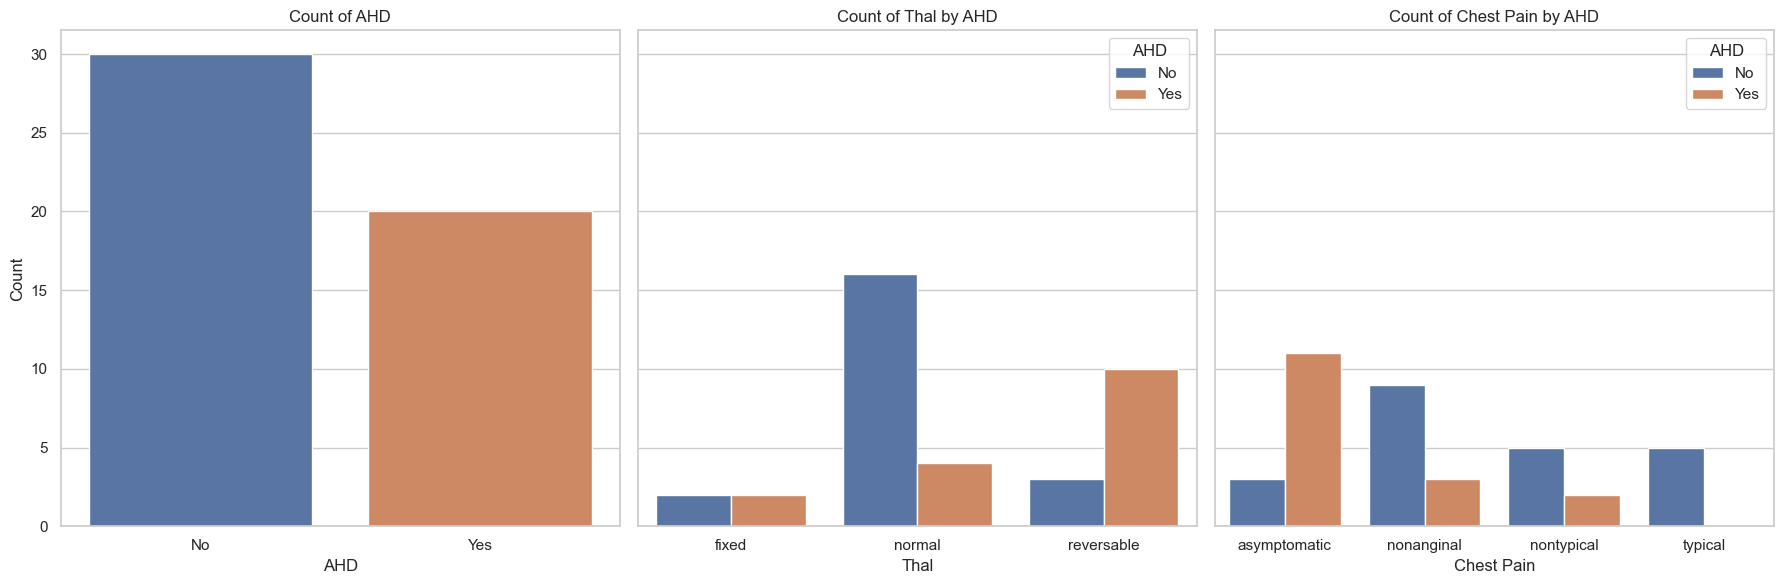

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.countplot(x='AHD', data=df_clf, hue='AHD', ax=axes[0])
axes[0].set_title('Count of AHD')
axes[0].set_xlabel('AHD')
axes[0].set_ylabel('Count')

sns.countplot(x='Thal', data=df_clf, hue='AHD', ax=axes[1])
axes[1].set_title('Count of Thal by AHD')
axes[1].set_xlabel('Thal')
axes[1].set_ylabel('')
axes[1].legend(title='AHD')

sns.countplot(x='ChestPain', data=df_clf, hue='AHD', ax=axes[2])
axes[2].set_title('Count of Chest Pain by AHD')
axes[2].set_xlabel('Chest Pain')
axes[2].set_ylabel('')
axes[2].legend(title='AHD')

plt.tight_layout()
plt.show()

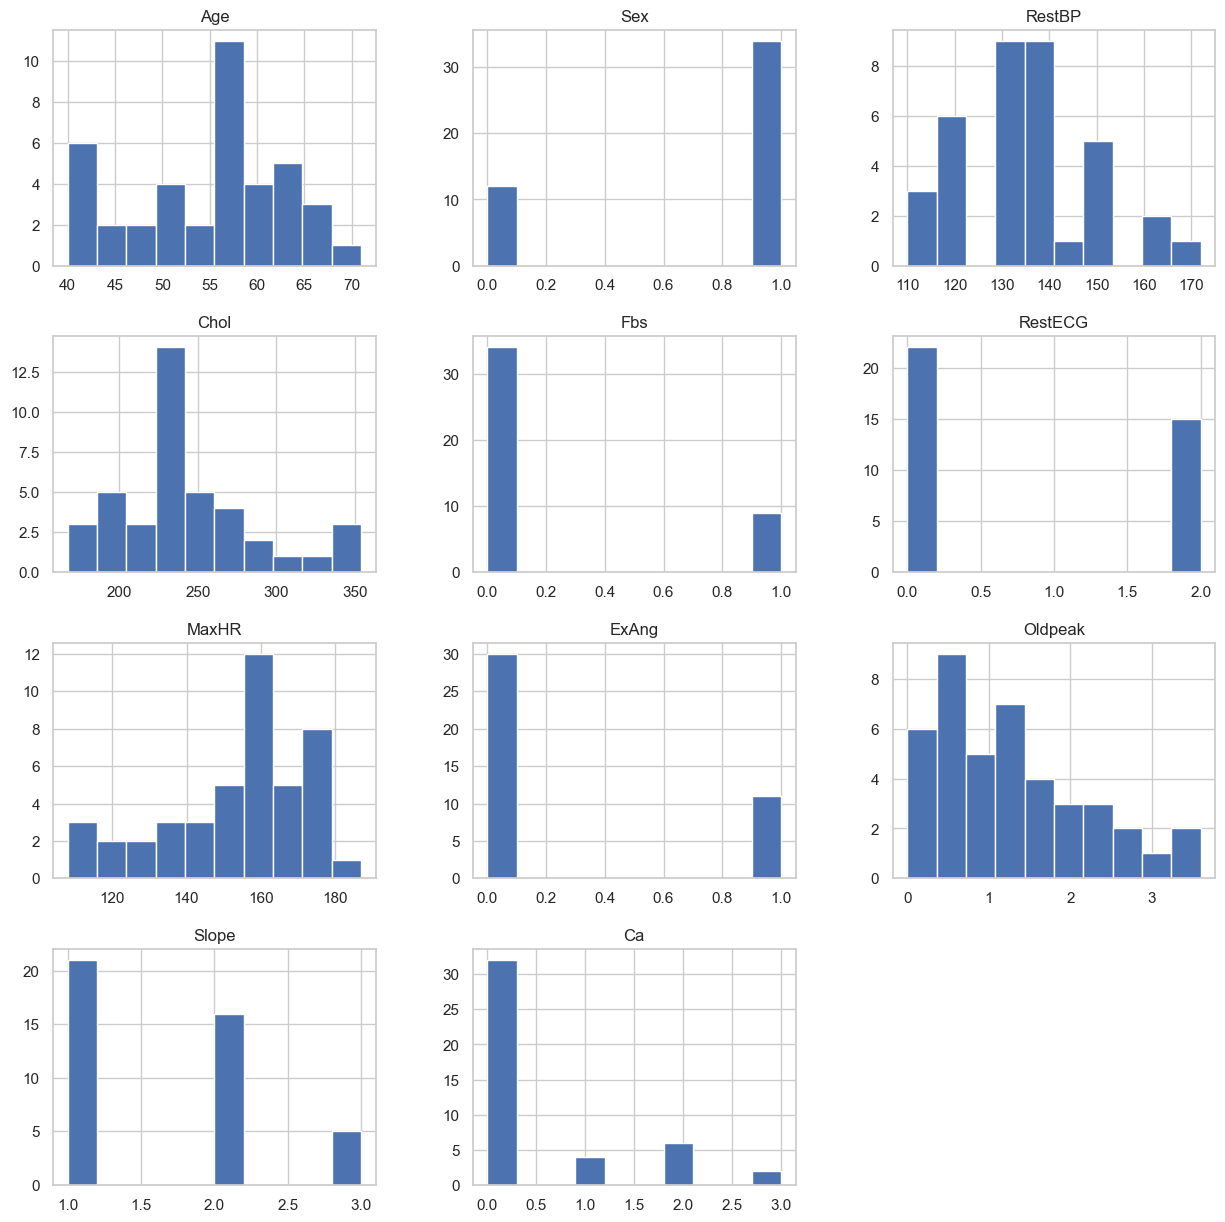

In [53]:
df_clf.hist(figsize=(15, 15))
plt.show()

In [54]:
X_clf = df_clf.drop('AHD', axis = 1)
y_clf = df_clf['AHD']

In [55]:
keep_columns = ['Sex', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Ca']
numerical_columns = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
categorical_columns = ['ChestPain', 'Thal']

In [56]:
categorical_preprocessor = OneHotEncoder()
numerical_preprocessor = Normalizer()

categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='mean')
keep_imputer = SimpleImputer(strategy='most_frequent')

X_clf[categorical_columns] = categorical_imputer.fit_transform(X_clf[categorical_columns])
X_clf[numerical_columns] = numerical_imputer.fit_transform(X_clf[numerical_columns])
X_clf[keep_columns] = numerical_imputer.fit_transform(X_clf[keep_columns])

target_preprocessor = LabelEncoder()
y_clf = target_preprocessor.fit_transform(y_clf)

preprocessor = ColumnTransformer(
    [
        ('categorical', categorical_preprocessor, categorical_columns),
        ('numerical', numerical_preprocessor, numerical_columns),
    ],
    remainder = 'passthrough',
)

In [57]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size = 0.3, random_state = 42)

In [58]:
estimator = LogisticRegression()

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('estimator', estimator),    
])

In [59]:
params_grid = [
    {
        'estimator__C': [0.001, 0.01, 0.1, 1], 
        'estimator__max_iter': [100, 200, 500], 
        'estimator__solver': ['lbfgs', 'liblinear', 'saga'],
        'estimator__class_weight': [None, 'balanced']
    },
]

In [60]:
cv=KFold(n_splits = 5, shuffle= True)

In [61]:
random = RandomizedSearchCV(pipeline, params_grid, cv=cv, n_jobs=-1, random_state = 1004, verbose = 1)
random.fit(X_clf_train, y_clf_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\Learning\University\UIT\HK4\OnTap\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categorical',
                                                                               OneHotEncoder(),
                                                                               ['ChestPain',
                                                                                'Thal']),
                                                                              ('numerical',
                                                                               Normalizer(),
                                                                               ['Age',
                                                                                'RestBP',
                                                                                'Chol',
                                                                                'MaxHR',
                                                                                'Oldpeak'])])),
                                             ('estimator',
                                              LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions=[{'estimator__C': [0.001, 0.01, 0.1, 1],
                                         'estimator__class_weight': [None,
                                                                     'balanced'],
                                         'estimator__max_iter': [100, 200, 500],
                                         'estimator__solver': ['lbfgs',
                                                               'liblinear',
                                                               'saga']}],
                   random_state=1004, verbose=1)

In [62]:
print(f"Best estimator: {random.best_estimator_}")
print(f"Best hyperparameters: {random.best_params_}")
print(f"Highest score: {random.best_score_}")

model = random.best_estimator_
y_clf_pred = model.predict(X_clf_test)
report = classification_report(y_clf_test, y_clf_pred, zero_division = 1.0)
print("Report:", report)

Best estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['ChestPain', 'Thal']),
                                                 ('numerical', Normalizer(),
                                                  ['Age', 'RestBP', 'Chol',
                                                   'MaxHR', 'Oldpeak'])])),
                ('estimator',
                 LogisticRegression(C=0.1, max_iter=500, solver='liblinear'))])
Best hyperparameters: {'estimator__solver': 'liblinear', 'estimator__max_iter': 500, 'estimator__class_weight': None, 'estimator__C': 0.1}
Highest score: 0.8
Report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.80      0.89         5

    accuracy   

In [63]:
df_reg=pd.read_csv('datasets/insurance.csv')
df_reg.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:
df_reg['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [65]:
df_reg.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [66]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
df_reg.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Distribution of Charges')

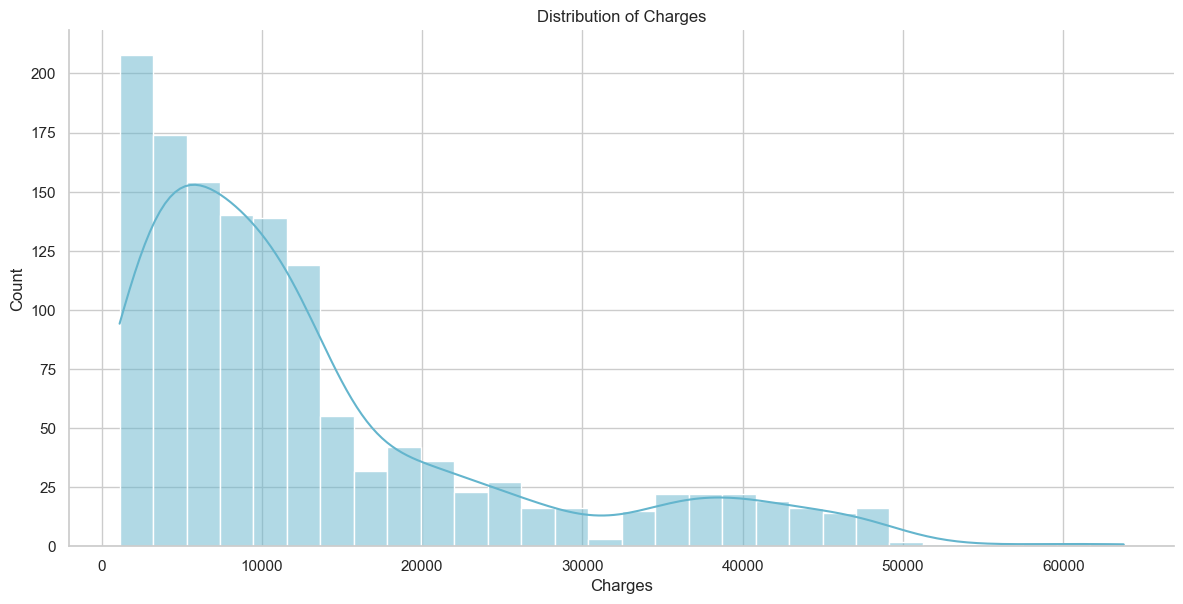

In [68]:
sns.displot(df_reg['charges'], kde=True, color='c', height=6, aspect=2) 

plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Charges')

Text(0.5, 1.0, 'Distribution of log Charges')

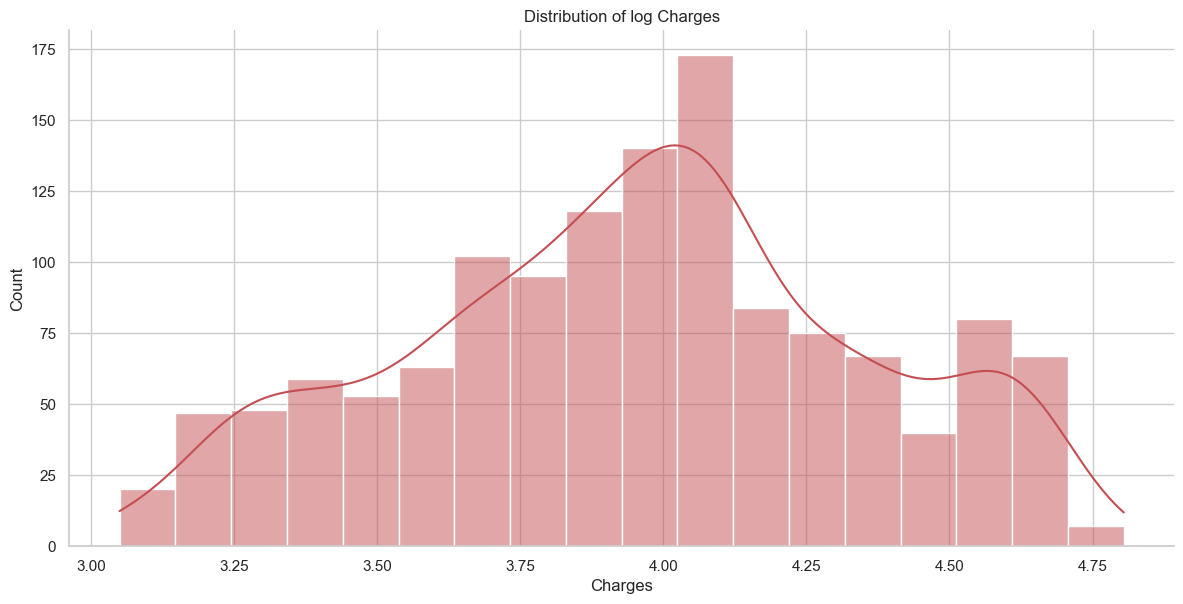

In [69]:
sns.displot(np.log10(df_reg['charges']), kde = True, color = 'r', height = 6, aspect=2)

plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of log Charges')

<Axes: xlabel='region', ylabel='charges'>

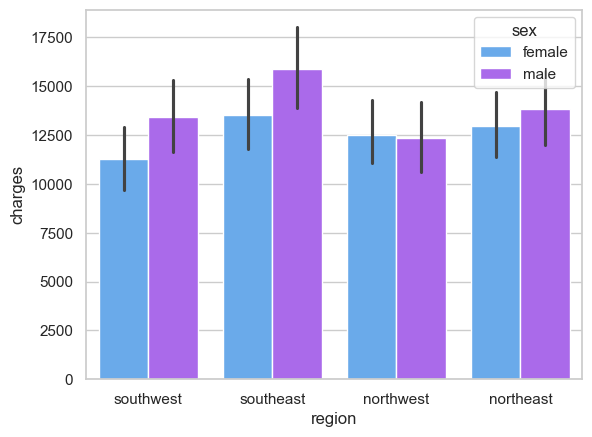

In [70]:
sns.barplot(x='region', y='charges', hue='sex', data=df_reg, palette='cool')

<Axes: xlabel='smoker', ylabel='charges'>

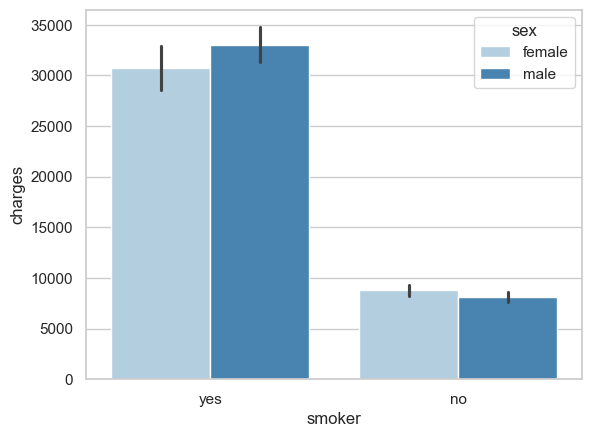

In [71]:
sns.barplot(x='smoker', y='charges', hue='sex', data=df_reg, palette='Blues')

<Axes: xlabel='region', ylabel='charges'>

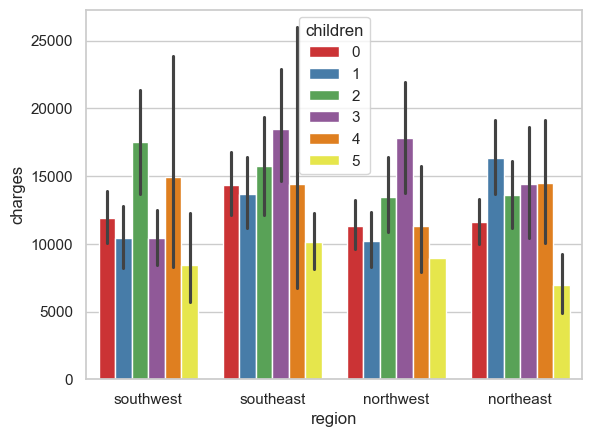

In [72]:
sns.barplot(x='region', y='charges', hue='children', data=df_reg, palette='Set1')

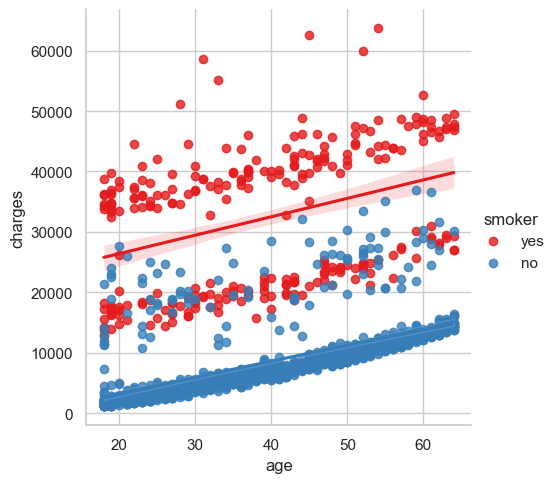

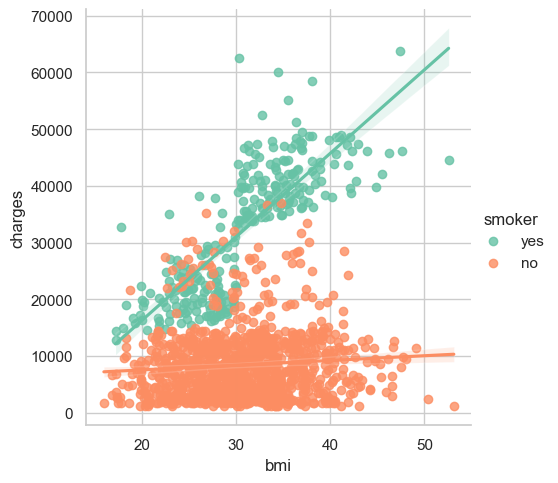

In [73]:
sns.lmplot(x = 'age', y = 'charges', data=df_reg, hue='smoker', palette='Set1')
sns.lmplot(x = 'bmi', y = 'charges', data=df_reg, hue='smoker', palette='Set2')

In [74]:
X_reg = df_reg.drop('charges', axis = 1)
y_reg = df_reg['charges']

In [75]:
label_encoder = LabelEncoder()
for column in ['smoker', 'sex']:
    X_reg[column] = label_encoder.fit_transform(X_reg[column])

onehot_encoder = OneHotEncoder(dtype=np.int64)
onehot_encoded = onehot_encoder.fit_transform(X_reg[['region']])
onehot_X_reg = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['region']))
onehot_X_reg.columns = onehot_X_reg.columns.str.replace('region_', '')
X_reg = pd.concat([X_reg.drop(['region'], axis=1), onehot_X_reg], axis=1)


In [76]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [77]:
estimator = LinearRegression()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', estimator),    
],
)

In [78]:
params_grid =[
    {
        'scaler' : [None, StandardScaler(), Normalizer()],
        'estimator__fit_intercept': [True, False],
    },
    {
        'scaler' : [None, StandardScaler(), Normalizer()],
        'estimator': [DecisionTreeRegressor()],
        'estimator__max_depth': [None, 5, 8, 10],
        'estimator__min_samples_split': [2, 5, 10],
        'estimator__min_samples_leaf': [1, 2, 4],
    },
    {
        'scaler' : [None, StandardScaler(), Normalizer()],
        'estimator': [TransformedTargetRegressor(regressor= DecisionTreeRegressor(), func = np.log, inverse_func=np.exp)],
        'estimator__regressor__max_depth': [None, 5, 8, 10],
        'estimator__regressor__min_samples_split': [2, 5, 10],
        'estimator__regressor__min_samples_leaf': [1, 2, 4],
    },
    {
        'scaler' : [None, StandardScaler(), Normalizer()],
        'estimator': [TransformedTargetRegressor(regressor= LinearRegression(), func = np.log, inverse_func=np.exp)],
        'estimator__regressor__fit_intercept': [True, False],
    }
]

In [79]:
cv = KFold(n_splits = 5, shuffle= True)

In [80]:
grid = GridSearchCV(pipeline, param_grid=params_grid, cv=cv, n_jobs=-1)
grid.fit(X_reg_train, y_reg_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'estimator__fit_intercept': [True, False],
                          'scaler': [None, StandardScaler(), Normalizer()]},
                         {'estimator': [DecisionTreeRegressor()],
                          'estimator__max_depth': [None, 5, 8, 10],
                          'estimator...
                          'estimator__regressor__min_samples_leaf': [1, 2, 4],
                          'estimator__regressor__min_samples_split': [2, 5, 10],
                          'scaler': [None, StandardScaler(), Normalizer()]},
                         {'estimator': [TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression())],
                          'estimator__regressor__fit_intercept': [True, False],
                          'scaler': [None, StandardScaler(), Normalizer()]}])

In [81]:
print(f"Best estimator: {grid.best_estimator_}")
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Highest score: {grid.best_score_}")

model = grid.best_estimator_
y_reg_pred = model.predict(X_reg_test)
report = r2_score(y_reg_test, y_reg_pred)
print("R2-Score:", report)

Best estimator: Pipeline(steps=[('scaler', None),
                ('estimator',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=DecisionTreeRegressor(max_depth=5,
                                                                            min_samples_leaf=4)))])
Best hyperparameters: {'estimator': TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor()), 'estimator__regressor__max_depth': 5, 'estimator__regressor__min_samples_leaf': 4, 'estimator__regressor__min_samples_split': 2, 'scaler': None}
Highest score: 0.8458172396655957
R2-Score: 0.8649516729021474
